In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import pandas as pd
import os
import requests
import dateutil
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_rows", 300)

# Frontex Route Traffic: Detected illegal border crossings

In [3]:
routes = pd.read_excel("data/Frontex-Detections_of_IBC_Press_for_FX_website_20180104.xlsx")

In [4]:
routes.head()

,Route,BorderLocation,NationalityLong,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,...,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00
0,Black Sea,Sea,Afghanistan,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Black Sea,Sea,Algeria,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Black Sea,Sea,Belarus,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Black Sea,Sea,Iran,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,32,0,0
4,Black Sea,Sea,Iraq,0,0,0,0,0,0,0,...,0,0,0,0,0,0,134,301,0,0


In [5]:
routes['Route'].value_counts()

Eastern Mediterranean                    218
Western Balkans                          121
Western Mediterranean                    113
Central Mediterranean                     89
Eastern Land Borders                      68
Circular Route from Albania to Greece     60
Western African                           34
Other                                     12
Black Sea                                 11
Not specified                              4
Name: Route, dtype: int64

**Route: 	Zones included**

Black Sea: 	Bulgaria and Romania sea borders

Western African: 	Canary Islands

Western Mediterranean: 	Spain land and sea borders without the Canary Islands

Central Mediterranean: 	Italy and Malta sea borders
Circular route from Albania to Greece: 	Greece land border with Albania and the former Yugoslav Republic of Macedonia

Eastern Land Borders: 	Romania, Hungary, Slovakia, Poland, Lithuania, Latvia, Estonia, Finland and Norway land borders with Moldova, Ukraine, Belarus and Russian Federation

Eastern Mediterranean: 	Cyprus, Greece sea border, Greece and Bulgaria land borders with Turkey

Other: 	Areas not included in the other routes. E.g.: Baltic Sea, North sea.


Western Balkans: 	Greece, Bulgaria, Romania, Hungary and Croatia at the land borders with countries from the Western Balkan region

In [6]:
duplicate_route_list = []

for route in routes['Route']:
    duplicate_route_list.append(route)
    
possible_routes = set(duplicate_route_list)

In [7]:
routes_aggregates = []

for column in routes.columns:
    route_aggregates_dict = {}
    if type(column) != str:
        route_aggregates_dict['time'] = column
        route_aggregates_dict['all_routes_crossings'] = routes[column].sum()
        for route in possible_routes:
            route_aggregates_dict[route] = routes[routes['Route']==route][column].sum()
        routes_aggregates.append(route_aggregates_dict)

routes_aggregated = pd.DataFrame(routes_aggregates)
routes_aggregated.head()

,Black Sea,Central Mediterranean,Circular Route from Albania to Greece,Eastern Land Borders,Eastern Mediterranean,Not specified,Other,Western African,Western Balkans,Western Mediterranean,all_routes_crossings,time
0,0,1491,1521,93,2730,0,0,361,189,508,6893,2009-01-01
1,1,1221,1884,82,2228,0,0,685,336,302,6739,2009-02-01
2,0,2519,2368,133,2870,0,1,392,365,656,9304,2009-03-01
3,0,1981,4207,112,3299,0,0,0,167,423,10189,2009-04-01
4,0,610,5512,115,3751,0,0,0,223,557,10768,2009-05-01


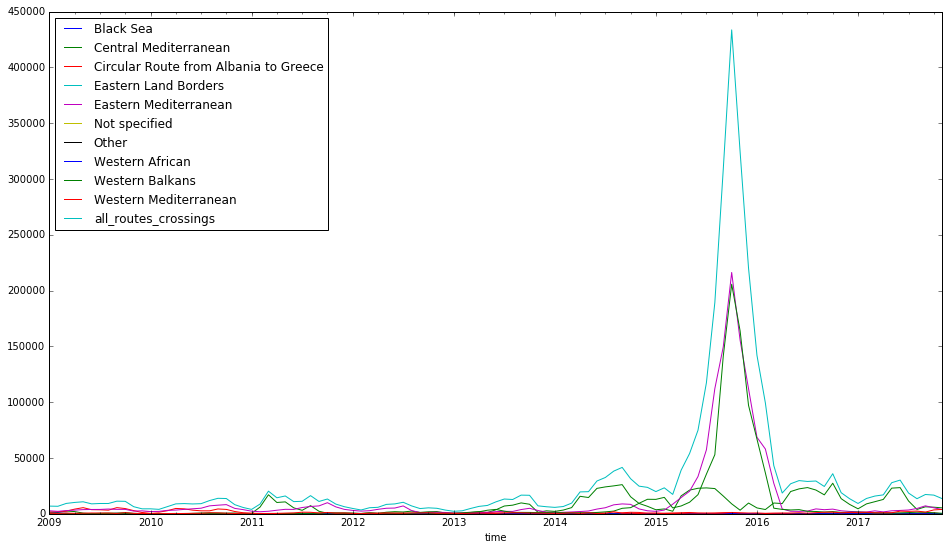

In [8]:
routes_aggregated.plot(kind='line', x='time', figsize=(16,9))

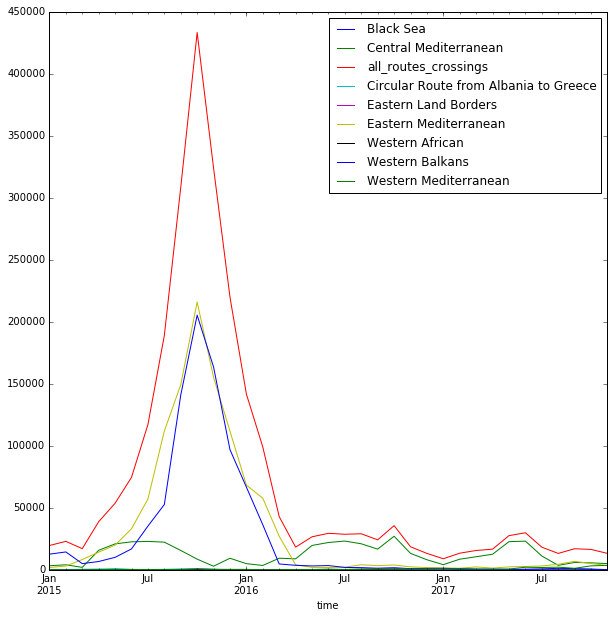

In [9]:
routes_aggregated[routes_aggregated['time']>"2014-12-01"][['Black Sea', 'Central Mediterranean', 'all_routes_crossings',
       'Circular Route from Albania to Greece', 'Eastern Land Borders',
       'Eastern Mediterranean', 'Western African',
       'Western Balkans', 'Western Mediterranean',
       'time']].plot(kind='line', x='time', figsize=(10,10),legend=True)

# plt.savefig("VisualDrafts/Frontex_IllegalCrossings.pdf", transparent = True)

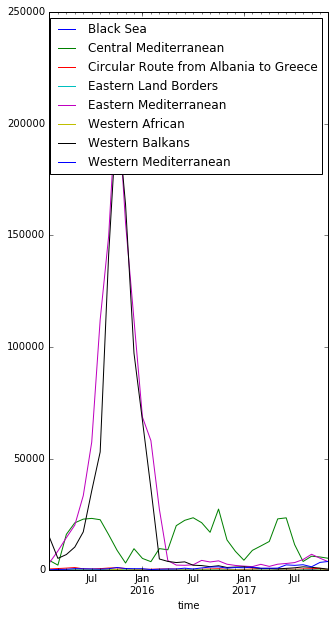

In [10]:
routes_aggregated[routes_aggregated['time']>"2015-01-01"][['Black Sea', 'Central Mediterranean',
       'Circular Route from Albania to Greece', 'Eastern Land Borders',
       'Eastern Mediterranean', 'Western African',
       'Western Balkans', 'Western Mediterranean',
       'time']].plot(kind='line', x='time', figsize=(5,10),legend=True)

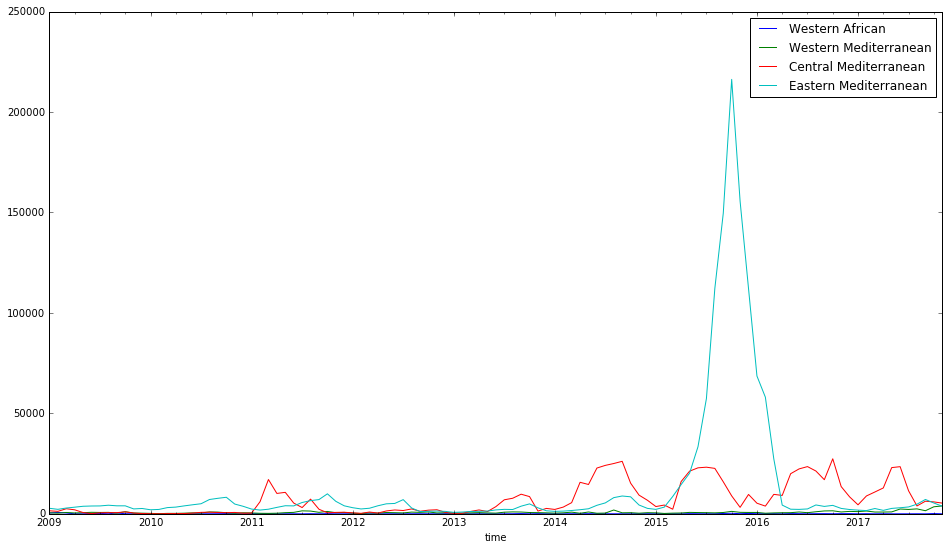

In [11]:
routes_aggregated[["time", "Western African", "Western Mediterranean","Central Mediterranean", "Eastern Mediterranean"]].plot(kind='line', x='time', figsize=(16,9))

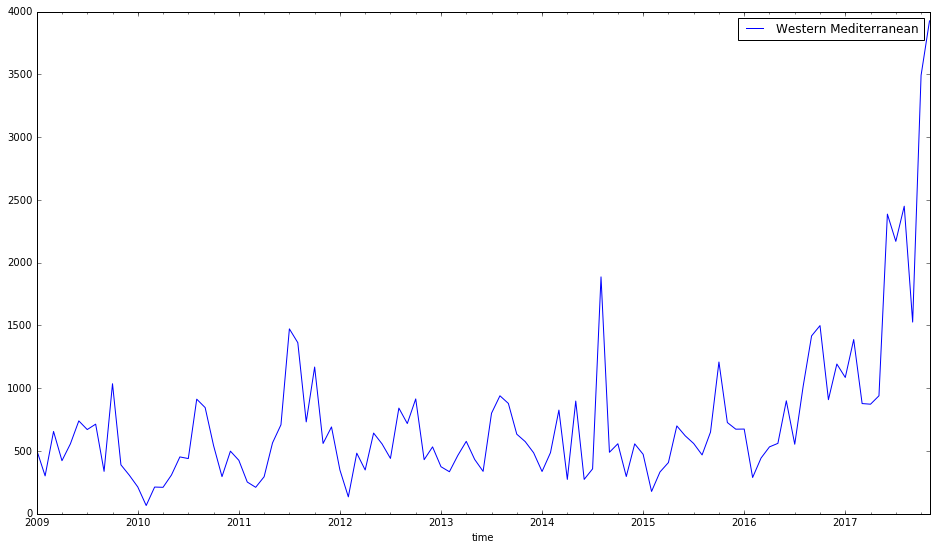

In [12]:
routes_aggregated[["time", "Western Mediterranean"]].plot(kind='line', x='time', figsize=(16,9))

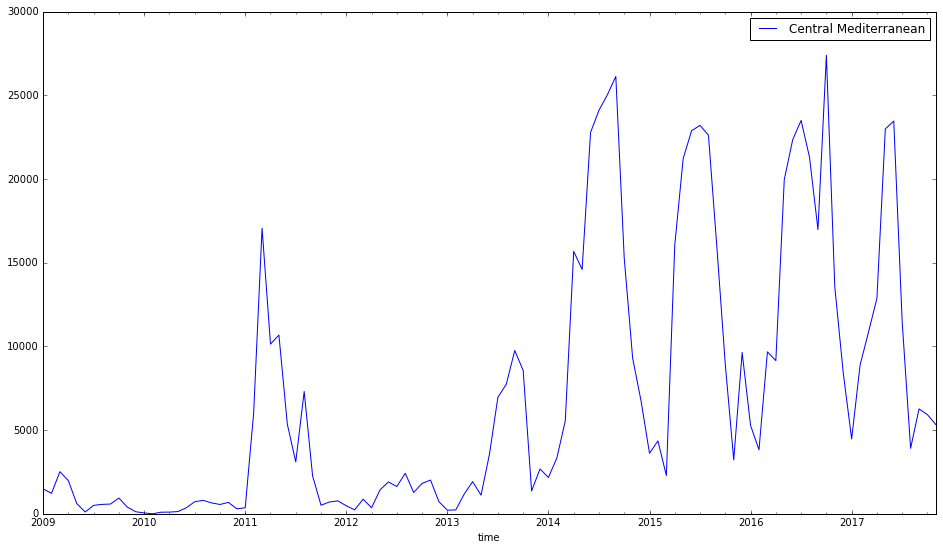

In [13]:
routes_aggregated[["time", "Central Mediterranean"]].plot(kind='line', x='time', figsize=(16,9))

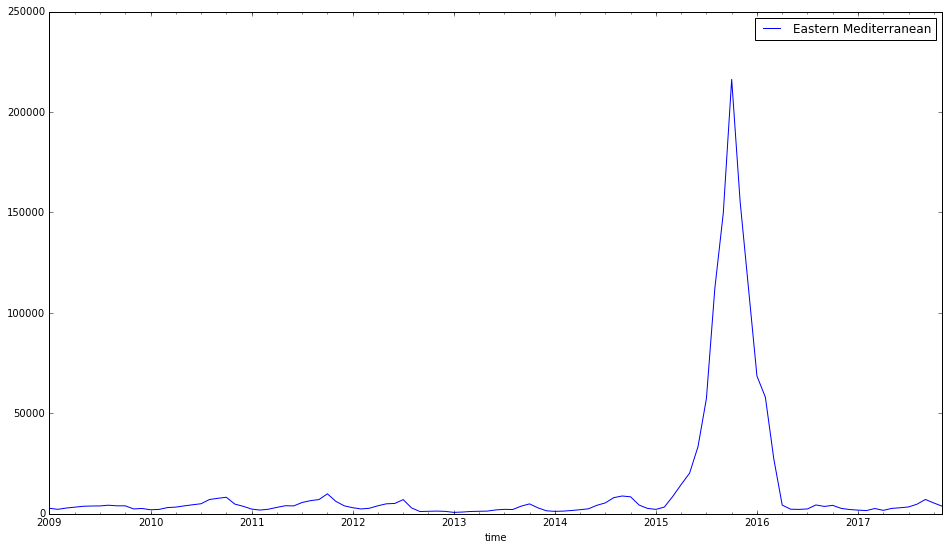

In [14]:
routes_aggregated[["time", "Eastern Mediterranean"]].plot(kind='line', x='time', figsize=(16,9))

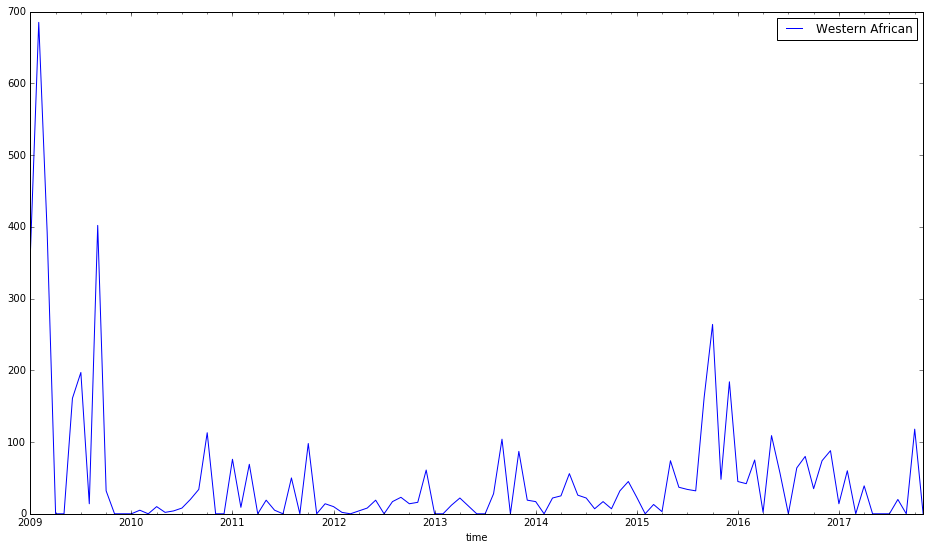

In [15]:
routes_aggregated[["time", "Western African"]].plot(kind='line', x='time', figsize=(16,9))

# Frontex Budget

In [16]:
frontexbudget = pd.read_csv("data/FrontexBudget_2012_2017.csv", delimiter=';')
frontexbudget.head()

,Chapter,Type,Description,2012,2013,2014,2015,2016,2017
0,A-900SubsidyfromtheCommission,NaN,Revenue,84000000.0,87400000.0,86810000.0,133528000.0,218686000.0,261267000.0
1,A-901ContributionfromSchengenAssociatedCountries,NaN,Revenue,4758000.0,5730000.0,5640000.0,8852000.0,13971000.0,19193000.0
2,A-902ContributionfromtheUnitedKingdomandIreland,NaN,Revenue,820000.0,820000.0,900000.0,820000.0,0.0,0.0
3,A-90Subsidiesandcontributions,NaN,Revenue,89578000.0,93950000.0,93350000.0,143200000.0,232657000.0,280460000.0
4,A-91OtherRevenue,NaN,Revenue,0.0,0.0,60700.0,100000.0,100000.0,100000.0


In [37]:
frontexbudget[(frontexbudget['Chapter']=="TOTALEXPENDITURE")|(frontexbudget['Chapter']=="A-30JointOperations")|(frontexbudget['Chapter']=="A-37ReturnSupport")]

,Chapter,Type,Description,2012,2013,2014,2015,2016,2017,budget_growth,growth_rate
22,A-30JointOperations,OperationalActivities,Expenditure,32567954.0,48381900.0,46330700.0,92009000.0,121977000.0,129365000.0,96797046.0,297.215619
29,A-37ReturnSupport,OperationalActivities,Expenditure,NaN,NaN,NaN,0.0,39585000.0,53060000.0,NaN,NaN
34,TOTALEXPENDITURE,Total,Expenditure,67392309.0,93950000.0,97945077.0,143300000.0,232757000.0,302029000.0,234636691.0,348.165383


In [38]:
frontexbudget_transposed = frontexbudget[(frontexbudget['Chapter']=="TOTALEXPENDITURE")|(frontexbudget['Chapter']=="A-30JointOperations")|(frontexbudget['Chapter']=="A-37ReturnSupport")][['Chapter','2012','2013','2014','2015','2016','2017']]
frontexbudget_transposed = frontexbudget_transposed.transpose()
frontexbudget_transposed.columns = frontexbudget_transposed.iloc[0]
frontexbudget_transposed = frontexbudget_transposed.drop('Chapter')
frontexbudget_transposed

Chapter,A-30JointOperations,A-37ReturnSupport,TOTALEXPENDITURE
2012,3.2568e+07,NaN,6.73923e+07
2013,4.83819e+07,NaN,9.395e+07
2014,4.63307e+07,NaN,9.79451e+07
2015,9.2009e+07,0,1.433e+08
2016,1.21977e+08,3.9585e+07,2.32757e+08
2017,1.29365e+08,5.306e+07,3.02029e+08


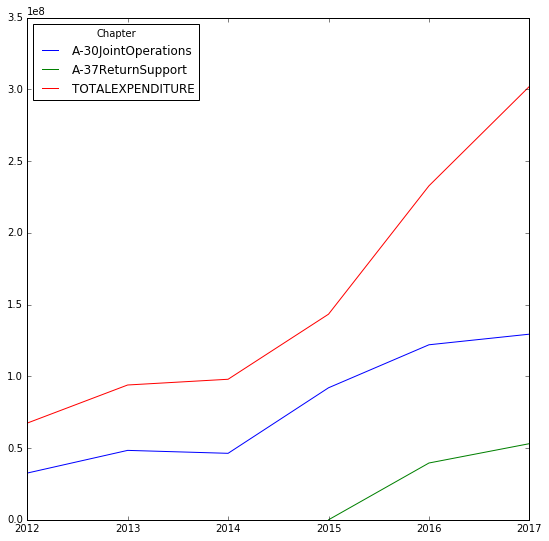

In [42]:
frontexbudget_transposed.plot(figsize = (9,9))
# plt.savefig("VisualDrafts/Frontex-Budget.pdf", transparent = True)

In [20]:
# calculate absolute budget increase
frontexbudget["budget_growth"]=frontexbudget['2017']-frontexbudget['2012']

In [21]:
frontexbudget[['Chapter','2012','2017','budget_growth']].sort_values(by='budget_growth', ascending = False)

,Chapter,2012,2017,budget_growth
34,TOTALEXPENDITURE,67392309.0,302029000.0,234636691.0
6,TOTALREVENUE,89578000.0,280560000.0,190982000.0
3,A-90Subsidiesandcontributions,89578000.0,280460000.0,190882000.0
31,A-3TOTALOPERATIONALACTIVITIES,40106657.0,229620000.0,189513343.0
0,A-900SubsidyfromtheCommission,84000000.0,261267000.0,177267000.0
22,A-30JointOperations,32567954.0,129365000.0,96797046.0
1,A-901ContributionfromSchengenAssociatedCountries,4758000.0,19193000.0,14435000.0
13,A-1TOTALSTAFFRELATEDEXPENDITURE,20422006.0,33686000.0,13263994.0
21,A-2TOTALOTHERADMINEXPENDITURE,8886794.0,21221206.0,12334412.0
7,A-11Staffinactiveemployment,19247175.0,31424000.0,12176825.0


In [22]:
# calculate growth rate of different chapters
frontexbudget["growth_rate"]=(frontexbudget['2017']-frontexbudget['2012'])/frontexbudget['2012']*100
frontexbudget[["Chapter", "Description", "2012","2017","growth_rate"]].sort_values(by="growth_rate", ascending=False)

,Chapter,Description,2012,2017,growth_rate
10,A-14Sociomedicalinfrastructure,Expenditure,0.0,21000.0,inf
28,A-36SupportingOperationalActivities,Expenditure,0.0,60000.0,inf
4,A-91OtherRevenue,Revenue,0.0,100000.0,inf
26,A-34PooledResources,Expenditure,593650.0,8900000.0,1399.199865
27,A-35MiscellaneousOperationalActivities,Expenditure,297296.0,3701109.0,1144.923914
16,A-22Movablepropertyandassociatedexpenditure,Expenditure,60206.0,599000.0,894.917450
23,A-31Riskanalysis,Expenditure,1356111.0,12430000.0,816.591636
15,A-21Dataprocessing&telecommunications,Expenditure,1251548.0,7243513.0,478.764298
31,A-3TOTALOPERATIONALACTIVITIES,Expenditure,40106657.0,229620000.0,472.523409
34,TOTALEXPENDITURE,Expenditure,67392309.0,302029000.0,348.165383


In [23]:
# see which sector grew significantly more than others

frontexbudget['growth_rate'].median()

219.05417406108552

In [24]:
import numpy as np

median_growth = np.nanpercentile(frontexbudget['growth_rate'], q=50)
median_growth

219.05417406108552

In [25]:
first_quantile = np.nanpercentile(frontexbudget['growth_rate'], q=25)
first_quantile

141.92322197569024

In [26]:
third_quantile = np.nanpercentile(frontexbudget['growth_rate'], q=75)
third_quantile

477.20407603685578

In [27]:
iqr = third_quantile - first_quantile

upper_acceptance_limit = third_quantile  + (iqr * 1.5)
print("Upper acceptance limit:", upper_acceptance_limit)
lower_acceptance_limit = first_quantile - (iqr * 1.5)
print("Lower acceptance limit:", lower_acceptance_limit)

Upper acceptance limit: 980.125357129
Lower acceptance limit: -360.998059116


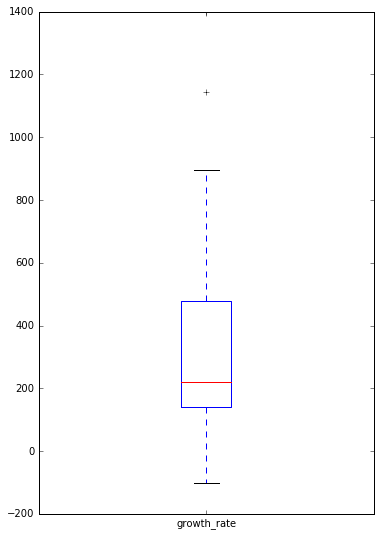

In [28]:
frontexbudget['growth_rate'].plot(kind = 'box', figsize = (6,9))

In [29]:
frontexbudget[frontexbudget['growth_rate'] >= upper_acceptance_limit]

,Chapter,Type,Description,2012,2013,2014,2015,2016,2017,budget_growth,growth_rate
4,A-91OtherRevenue,NaN,Revenue,0.0,0.0,60700.0,100000.0,100000.0,100000.0,100000.0,inf
10,A-14Sociomedicalinfrastructure,Staff,Expenditure,0.0,64000.0,11000.0,40000.0,70000.0,21000.0,21000.0,inf
26,A-34PooledResources,OperationalActivities,Expenditure,593650.0,1100000.0,1000000.0,1400000.0,4275000.0,8900000.0,8306350.0,1399.199865
27,A-35MiscellaneousOperationalActivities,OperationalActivities,Expenditure,297296.0,1163951.0,567000.0,857000.0,1070000.0,3701109.0,3403813.0,1144.923914
28,A-36SupportingOperationalActivities,OperationalActivities,Expenditure,0.0,0.0,600000.0,407000.0,140000.0,60000.0,60000.0,inf


In [30]:
interesting_chapters = ["A-31Riskanalysis", "A-21Dataprocessing&telecommunications", "A-30JointOperations"]

In [31]:
selected_budget_positions = frontexbudget[(frontexbudget["Chapter"]=="A-31Riskanalysis") | (frontexbudget["Chapter"]=="A-21Dataprocessing&telecommunications") | (frontexbudget["Chapter"]=="A-30JointOperations")]
selected_budget_positions

,Chapter,Type,Description,2012,2013,2014,2015,2016,2017,budget_growth,growth_rate
15,A-21Dataprocessing&telecommunications,OtherAdministration,Expenditure,1251548.0,2350000.0,4040000.0,4260000.0,6896000.0,7243513.0,5991965.0,478.764298
22,A-30JointOperations,OperationalActivities,Expenditure,32567954.0,48381900.0,46330700.0,92009000.0,121977000.0,129365000.0,96797046.0,297.215619
23,A-31Riskanalysis,OperationalActivities,Expenditure,1356111.0,4265000.0,6801000.0,11305000.0,14695000.0,12430000.0,11073889.0,816.591636


In [32]:
selected_budget_positions_transposed = selected_budget_positions[['Chapter','2012','2013','2014','2015','2016','2017']]
selected_budget_positions_transposed = selected_budget_positions_transposed.transpose()
selected_budget_positions_transposed.columns = selected_budget_positions_transposed.iloc[0]
selected_budget_positions_transposed = selected_budget_positions_transposed.drop('Chapter')
selected_budget_positions_transposed

Chapter,A-21Dataprocessing&telecommunications,A-30JointOperations,A-31Riskanalysis
2012,1.25155e+06,3.2568e+07,1.35611e+06
2013,2.35e+06,4.83819e+07,4.265e+06
2014,4.04e+06,4.63307e+07,6.801e+06
2015,4.26e+06,9.2009e+07,1.1305e+07
2016,6.896e+06,1.21977e+08,1.4695e+07
2017,7.24351e+06,1.29365e+08,1.243e+07


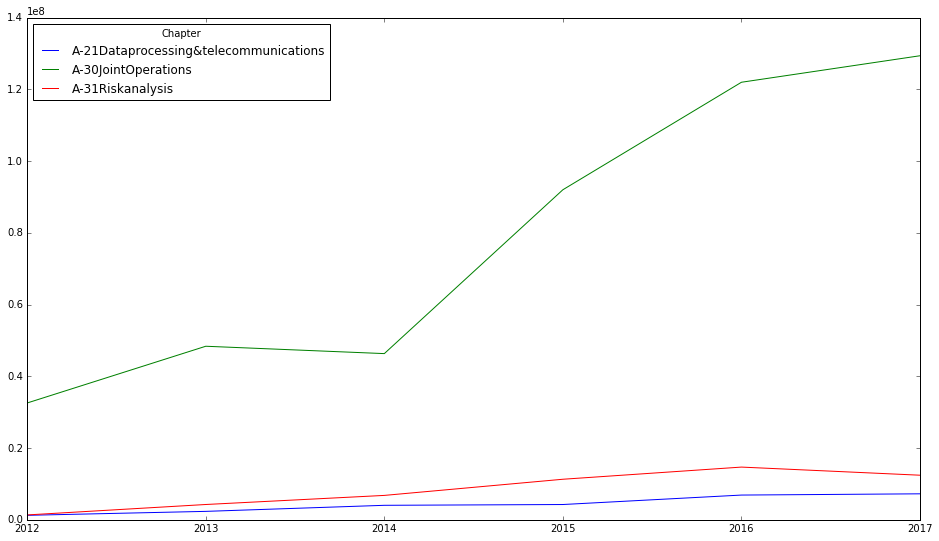

In [33]:
selected_budget_positions_transposed.plot(figsize = (16,9))

**Find**: Joint Operations budget position is the single largest position and quadrupled since 2012 (from 32 million to 129 million)

In [34]:
frontexbudget[frontexbudget['Chapter']=="A-37ReturnSupport"]

,Chapter,Type,Description,2012,2013,2014,2015,2016,2017,budget_growth,growth_rate
29,A-37ReturnSupport,OperationalActivities,Expenditure,NaN,NaN,NaN,0.0,39585000.0,53060000.0,NaN,NaN


In [35]:
frontexbudget["2017"].describe()

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    3.200000e+01
mean     5.339676e+07
std      9.860216e+07
min      0.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      3.020290e+08
Name: 2017, dtype: float64

**Find**: Since 2016, the budget also included a position on "Return Support". It had a budget of 39 million in 2016 and was increased to 53 million in 2017 (increase by 30 percent), making it the second biggest single position on budget.